In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts 

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
import my_library.gluex_style as gxstyle

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)


In [4]:
df_pipkmks = df_pipkmks.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.P_P_CUT)

In [9]:
hist_ks_before = df_pipkmks.Histo1D(('ks_before', 'M(#pi^{+}#pi^{-}) [GeV]', 450, 0.25, 0.7), 'ks_m')
hist_pl_vs_ks = df_pipkmks.Histo2D(('pl_vs_ks', 'Pathlength Signifigance vs M(#pi^{+}#pi^{-})', 450, 0.25, 0.7, 100, 0, 10), 'ks_m', 'pathlength_sig')
hist_ks_after = df_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT).Histo1D(('ks_after', 'M(#pi^{+}#pi^{-}) [GeV]', 450, 0.25, 0.7), 'ks_m')

In [10]:
c = ROOT.TCanvas()

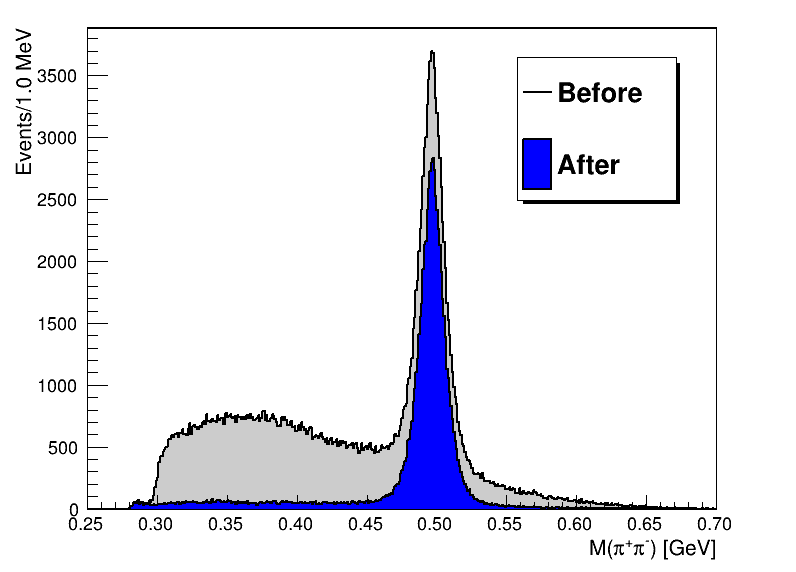

In [15]:
hist_ks_before.GetXaxis().SetTitle('M(#pi^{+}#pi^{-}) [GeV]')
hist_ks_before.GetYaxis().SetTitle(f'Events/{(0.75-0.25)/500*1000} MeV')
hist_ks_after.SetFillColor(ROOT.kBlue)
legend = ROOT.TLegend(0.65, 0.65, 0.85, 0.9)
legend.AddEntry(hist_ks_before.GetPtr(), 'Before', 'l')
legend.AddEntry(hist_ks_after.GetPtr(), 'After', 'f')
hist_ks_before.Draw()
hist_ks_after.Draw('same')
c.Draw()
legend.Draw()


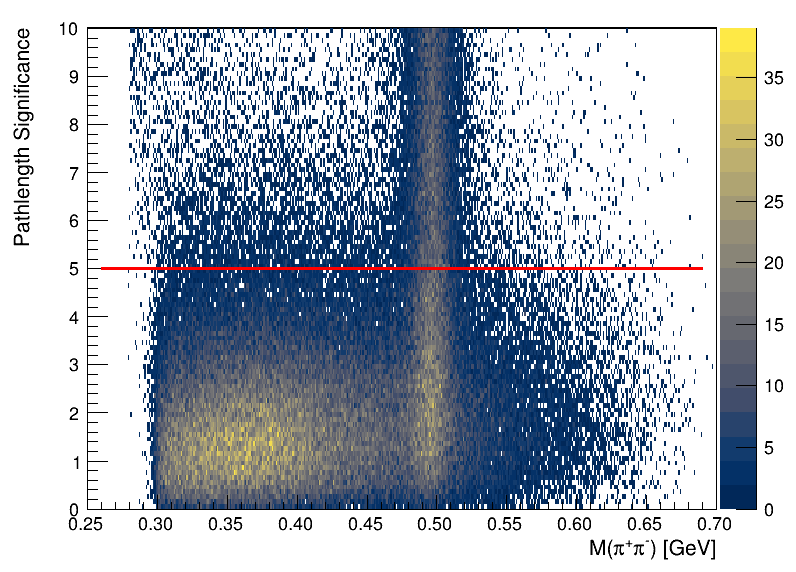

In [22]:
pl_cut_line = ROOT.TLine(0.26, 5, 0.69, 5)
pl_cut_line.SetLineColor(ROOT.kRed)
pl_cut_line.SetLineWidth(3)
hist_pl_vs_ks.GetXaxis().SetTitle('M(#pi^{+}#pi^{-}) [GeV]')
hist_pl_vs_ks.GetYaxis().SetTitle('Pathlength Significance')
hist_pl_vs_ks.GetZaxis().SetTitleOffset(1.3)
c.SetRightMargin(0.1)
hist_pl_vs_ks.Draw('colz')
pl_cut_line.Draw()
c.Draw()
